In [43]:
import pandas as pd

#### Data Input and PreProcessing

In [44]:
df = pd.read_csv('D:/Ravi/Ruma/Python Practice/bbc-fulltext-and-category/bbc-text.csv')

In [45]:
df.shape

(2225, 2)

In [46]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [47]:
df.tail()

,category,text
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...
2224,sport,souness delight at euro progress boss graeme s...


#### Converting the labels into factors

In [48]:
df['categoryId'] = df['category'].factorize()[0]

In [49]:
df['text'] = df['text'].astype('str')

In [50]:
df['text'].values.dtype

dtype('O')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
category      2225 non-null object
text          2225 non-null object
categoryId    2225 non-null int64
dtypes: int64(1), object(2)
memory usage: 52.2+ KB


In [52]:
df.head()

,category,text,categoryId
0,tech,tv future in the hands of viewers with home th...,0
1,business,worldcom boss left books alone former worldc...,1
2,sport,tigers wary of farrell gamble leicester say ...,2
3,sport,yeading face newcastle in fa cup premiership s...,2
4,entertainment,ocean s twelve raids box office ocean s twelve...,3


In [53]:
df.tail()

,category,text,categoryId
2220,business,cars pull down us retail figures us retail sal...,1
2221,politics,kilroy unveils immigration policy ex-chatshow ...,4
2222,entertainment,rem announce new glasgow concert us band rem h...,3
2223,politics,how political squabbles snowball it s become c...,4
2224,sport,souness delight at euro progress boss graeme s...,2


In [54]:
category_id_df = df[[ 'category','categoryId']].drop_duplicates().sort_values('categoryId')

In [55]:
category_to_id = dict(category_id_df.values)

In [56]:
id_to_category = dict(category_id_df[['categoryId','category']].values)

In [57]:
category_id_df

,category,categoryId
0,tech,0
1,business,1
2,sport,2
4,entertainment,3
5,politics,4


In [93]:
sorted(category_to_id.items())

[('business', 1),
 ('entertainment', 3),
 ('politics', 4),
 ('sport', 2),
 ('tech', 0)]

In [58]:
category_to_id

{'business': 1, 'entertainment': 3, 'politics': 4, 'sport': 2, 'tech': 0}

In [59]:
id_to_category

{0: 'tech', 1: 'business', 2: 'sport', 3: 'entertainment', 4: 'politics'}

#### Data Exploration

In [60]:
df.sample(5,random_state=0)  # looking at some random examples

,category,text,categoryId
384,politics,drive to save festive holidays efforts are b...,4
1983,sport,officials respond in court row australian tenn...,2
985,sport,cup holders man utd visit everton holders manc...,2
1386,sport,adriano s chelsea link rejected adriano s agen...,2
1294,sport,o driscoll/gregan lead aid stars ireland s bri...,2


In [61]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [77]:
import re, string, unicodedata
import nltk
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [78]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words






In [80]:
df['text'] = normalize(df['text'])

In [81]:
df.head()

,category,text,categoryId
0,tech,tv future in the hands of viewers with home th...,0
1,business,worldcom boss left books alone former worldc...,1
2,sport,tigers wary of farrell gamble leicester say ...,2
3,sport,yeading face newcastle in fa cup premiership s...,2
4,entertainment,ocean s twelve raids box office ocean s twelve...,3


#### for each term in our dataset, we will calculate a measure called Term Frequency, Inverse Document Frequency.  TFIDF represents words’ importance in each document.

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
tfidf = TfidfVectorizer(stop_words = 'english')

In [85]:
features = tfidf.fit_transform(df.text).toarray()
labels = df.categoryId
features.shape

C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


(2225, 32443)

#### we can use the chi-squared test to find the terms are the most correlated with each of the categories:

In [87]:
from sklearn.feature_selection import chi2

In [95]:
import numpy as np

In [96]:
N=3

In [97]:
for category, categoryId in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == categoryId)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    
    

In [99]:
from sklearn.manifold import TSNE

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
SAMPLE_SIZE = int(len(features)*0.3)

In [101]:
np.random.seed(0)

In [102]:
indices = np.random.choice(range(len(features)), size = SAMPLE_SIZE, replace = False)

In [103]:
projected_features = TSNE(n_components = 2,random_state=0).fit_transform(features[indices])

In [104]:
colors = ['pink','green','midnightblue','orange','darkgrey']

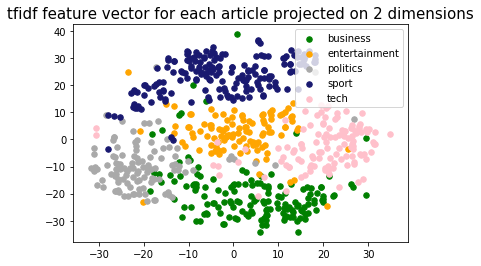

In [109]:
for category, categoryId in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == categoryId).values]
    plt.scatter(points[:,0], points[:,1],s=30,c=colors[categoryId], label=category)
    
plt.title("tfidf feature vector for each article projected on 2 dimensions", fontdict=dict(fontsize=15))
plt.legend()

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [111]:
from sklearn.model_selection import cross_val_score

In [112]:
models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
          MultinomialNB(),
         LogisticRegression(random_state=0)]

In [113]:
CV=5

In [115]:
cv_df = pd.DataFrame(index=range(CV*len(models)))

In [116]:
entries=[]

In [119]:
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model,features,labels,scoring="accuracy",cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx,accuracy))
cv_df = pd.DataFrame(entries,columns=['model_name','fold_idx','accuracy'])

In [123]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.796875
1,RandomForestClassifier,1,0.811236
2,RandomForestClassifier,2,0.826577
3,RandomForestClassifier,3,0.795045
4,RandomForestClassifier,4,0.815315
5,MultinomialNB,0,0.968750
6,MultinomialNB,1,0.975281
7,MultinomialNB,2,0.977477
8,MultinomialNB,3,0.948198
9,MultinomialNB,4,0.968468


In [120]:
import  seaborn as sns

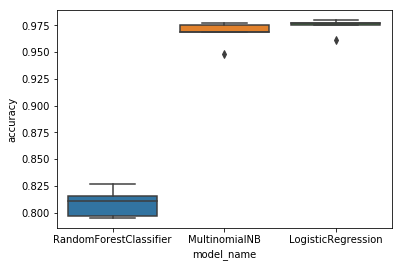

In [121]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)

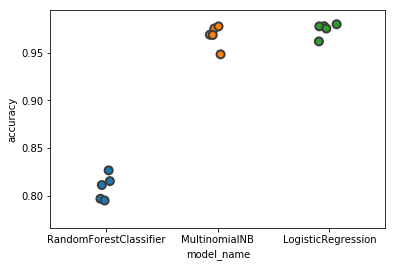

In [122]:
sns.stripplot(x='model_name',y='accuracy',data=cv_df,size=8,jitter=True,edgecolor='gray',linewidth=2)